In [3]:
# read the network
filepath = '30k.graph'
vertices = [];
edges = [];
readVertices = 0;
readEdges = 0;
with open(filepath) as fp:  
    line = fp.readline()
    cnt = 1
    while line:
        #print("Line {}: {}".format(cnt, line.strip()))
        
        if readVertices == 1:
            vertexData = line.strip().split(';');
            if len(vertexData)==4:
                idxGroup = int(vertexData[3]);
                vertices.append([int(vertexData[0]),idxGroup])
                
        if readEdges == 1:
            edgeData = line.strip().split(';');
            if len(edgeData)==2:
                edges.append([int(edgeData[0]),int(edgeData[1])])
                vertices[int(edgeData[0])].append(int(edgeData[1]));

        
        if line.strip() == '# Vertices':
            print('read vertices')
            readVertices = 1;
        if line.strip() == '# Edges':
            readVertices = 0;
            readEdges = 1;
            print('read edge')
        line = fp.readline()
        cnt += 1
        line.strip() 
#array con 1 elemento: numero vertice, 2 elemento: grupo que se encuentra
# resto son los vertices con los que se comunica
#print(edges)

read vertices
read edge


Tamaño poblacion
30000
cantidad de pares de comunicacion


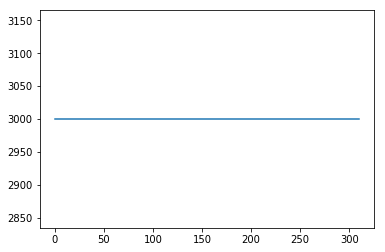

Porcentaje grupos con distinta media de crimen
[0.07263333 0.10706667 0.1207     0.08643333 0.0677     0.08786667
 0.136      0.09116667 0.12053333 0.1099    ]
Vector media de crimen por grupos
[0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  0.99 1.1 ]
velocidad de olvido
0.9
impacto de la inseguridad nu
0.9
Resistencia a la inseguridad mu
0.1
Homofilia
0.766784188034188
PoS media por grupos


/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/home/runlab/.virtualenvs/cpulido/local/lib/python2.7/site-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/home/runla

Text(-25,0,'Secure')

<Figure size 1440x360 with 0 Axes>

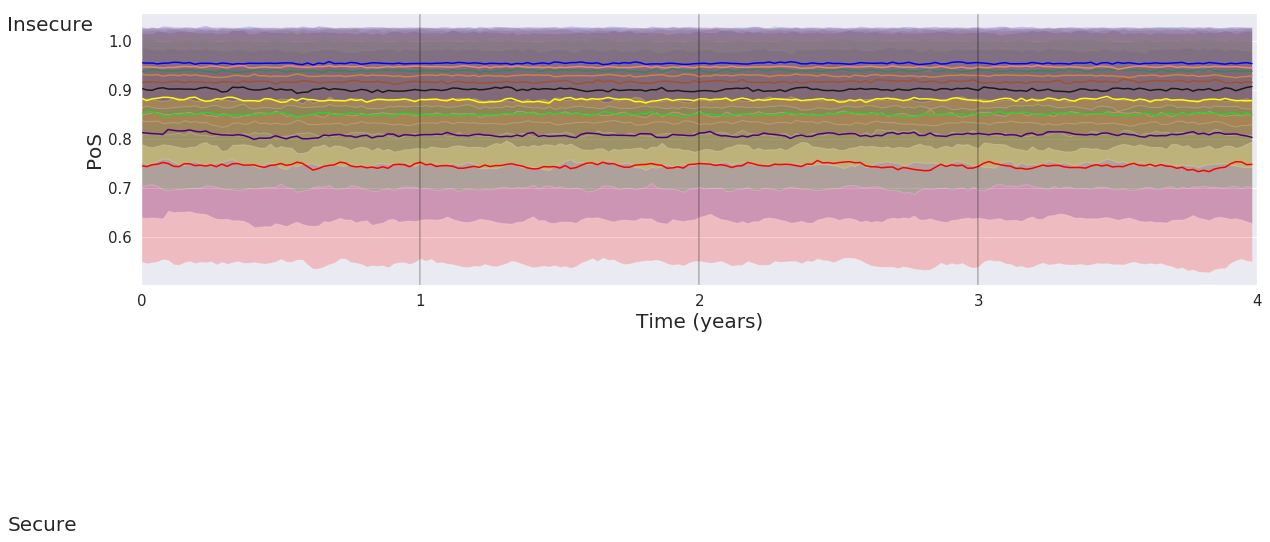

In [4]:
#Simulacion Pos
import numpy as np
import random
import matplotlib.pyplot as plt
n=len(vertices)
#vector identificacion de grupo
g=np.zeros(n)
for i in range(n):
    g[i]=vertices[i][1]
# cantidad de grupos
m=int(max(g)+1)
#porcentaje de cada grupo
q=np.zeros(m)
for i in range(m):
    q[i]=sum((g==i)*1.0)/n
#periodos en semanas
T=312 #6 años
s = np.random.rand(n)  # vector PoS de las personas en el intante t, al principio aleatorio
psi = 0.9  # velocidad perdida de memoria
nu = 0.9  # Impacto de la inseguridad
mu = 0.1  # Resistencia a la inseguridad
St = np.zeros((T,n ))  # PoS a lo largo del tiempo
lamda=np.array([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99,1.1])
#lamda = np.random.rand(m)  # tasas de crimen de los grupos
#lamda[np.argmax(q)]=0 # para la mayor parte es el grupo inmune
#lamda=[0.05,0,0.5]
#identificacion de cada sujeto con su respectiva media de crimen
for i in range(n):
    for j in range(m):
        if g[i]==j:
            g[i]=lamda[j]
homofilia=np.zeros(T)
St[0] = s
parescom=np.zeros(T)#cantidad pares de comunicacion en cada periodo
commismogrupo=np.zeros(T)#cantidad de comunicaciones en el mismo grupo
for t in range(1,T):
        # Al inicio de cada periodo aplicamos la perdida de memoria
        s = psi * s
        
        #escogemos las parejas de comunicacion 
        paleatorio=np.random.permutation(np.arange(n))#personas grupo 1 en orden aleatorio
        persona1=paleatorio[:int(n*0.1)] #primer 10%
        persona2=np.zeros_like(persona1)


        for k in range(len(persona1)):
            #para grupo 1
            aux1=persona1[k]
            aux2=np.random.choice(vertices[aux1][2:])
            contador=0
            while aux2 in persona1 or aux2 in persona2:
                aux2=np.random.choice(vertices[aux1][2:])
                contador=contador+1
                if contador>5:
                        break
            if s[aux1]<s[aux2]:
                s[aux1] = s[aux1] - nu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - mu * (s[aux2] - s[aux1])
            else:
                s[aux1] = s[aux1] - mu * (s[aux1] - s[aux2])
                s[aux2] = s[aux2] - nu * (s[aux2] - s[aux1])

            if g[aux1]==g[aux2]:
                commismogrupo[t]=commismogrupo[t]+1
        
        parescom[t]=len(persona1)
        homofilia[t]=commismogrupo[t]/parescom[t]
    

        for k in range(n):
            # numero de crimenes sufridos por la persona k 
            X = np.random.poisson(g[k])
            # posicion hubo crimen o no
            I = 0
            if X >= 1:  # si hubo al menos un crimen I=1 de lo contrario I=0
                I = 1
            # efecto del crimen en la percepcion de k para el siguiente periodo
            s[k] = I + (1 - I) * s[k] 
        St[t] = s
print("Tamaño poblacion")
print(n)
print("cantidad de pares de comunicacion")
plt.plot(parescom[1:])
plt.show()
print("Porcentaje grupos con distinta media de crimen")
print(q)
print("Vector media de crimen por grupos")
print(lamda)
print("velocidad de olvido")
print(psi)
print("impacto de la inseguridad nu")
print(nu)
print("Resistencia a la inseguridad mu")
print(mu)
print("Homofilia")
print(np.mean(homofilia))

%matplotlib inline 
plt.figure(figsize=(20,5))
#print("Grafica PoS individual")
#plt.plot(St[104:],alpha=0.1)
#plt.plot(np.mean(St[104:],axis=1),'blue',linewidth=8)
#plt.show()
import seaborn as sns
sns.set(color_codes=True)
plt.figure(figsize=(20,5))
print("PoS media por grupos")
colores=["Red","indigo","limegreen","yellow","k","sienna","peru","seagreen","salmon","blue"]
G=[]
for i in range(m):
    grupo=np.zeros((T,int(n*q[i])))
    contador=0
    for k in range(n):
        if g[k]==lamda[i]:
            grupo[:,contador]=St[:,k]
            contador=contador+1
    #plt.plot(grupo,alpha=0.1)
    sns.tsplot(data=grupo[104:].T,ci='sd',color=colores[i])
    G.append(grupo[104:].T)
#plt.legend(["susceptible", "immune", "highly susceptible"],ncol=3,fontsize=20,bbox_to_anchor=(0, -0.3), loc=2, borderaxespad=0)
plt.axvline(52, color = 'black',alpha=0.3)
plt.axvline(104, color = 'black',alpha=0.3)
plt.axvline(156, color = 'black',alpha=0.3)
plt.xlabel("Time (years)",fontsize=20)
plt.ylabel("PoS",fontsize=20)
ax = plt.axes()
ax.xaxis.set_ticks([0, 52, 104, 156, 208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])
ax.tick_params(labelsize=15)
plt.text(-25, 1.02,'Insecure', fontsize=20)
plt.text(-25, 0,'Secure', fontsize=20)

                

[Text(0,0,'0'), Text(0,0,'1'), Text(0,0,'2'), Text(0,0,'3'), Text(0,0,'4')]

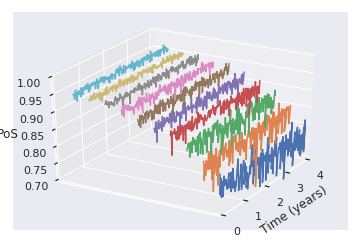

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

tiempo=G[0].shape[1]

g=[]
for k in range(m):
    mean=np.zeros(tiempo)
    std=np.zeros(tiempo)
    for i in range(tiempo):
        mean[i]=np.mean(G[k][i][:])
    g.append((G[k],mean))
    ax.plot(xs=np.arange(tiempo),ys=k*0.1*np.ones(tiempo),zs=mean)


# ax.plot(xs=np.arange(tiempo),ys=np.zeros(tiempo),zs=gimean,c='indigo')
# ax.plot(xs=np.arange(tiempo),ys=0.5*np.ones(tiempo),zs=gsmean,c='red')
# ax.plot(xs=np.arange(tiempo),ys=np.ones(tiempo),zs=ghmean,c='limegreen')
ax.set_xlabel('Time (years)')
ax.set_ylabel('')
ax.set_zlabel('PoS')
ax.view_init(azim=210)
# ax.legend(["immune","susceptible","highly susceptible" ])
ax.set_xlim(0, 208)
ax.set_ylim(0, 1)
ax.set_zlim(0.7, 1)
ax.set_yticks([])
ax.set_xticks([0,52,104,156,208])
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4'])

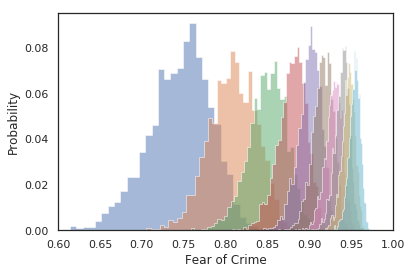

In [25]:
# for t in range(0,200,200):
#     for k in range(m):
#         p=G[k].shape[0]
#         g=np.zeros(p)
#         for j in range(p):
#             g[j]=np.mean(G[k][j])

# #         g=G[k][:,t]
#         sns.distplot(g)
#     plt.show()
#     plt.xlim(0.5,1)
for k in range(m):
    p=G[k].shape[0]
    g=np.zeros(p)
    for j in range(p):
        g[j]=np.mean(G[k][j])
    weights = np.ones_like(g)*1.0/float(len(g))#n
    sns.distplot(g,hist_kws={'weights':weights,'alpha':0.5,'histtype':'stepfilled'},kde=False)
plt.xlabel('Fear of Crime')
plt.ylabel('Probability')
sns.set_style("white")
plt.grid(False)
plt.xlim(0.6,1)
plt.savefig("dist_10g.pdf")

          0         1         2         3         4         5         6  \
0  0.000000  0.375105  0.645298  0.843816  0.973054  1.136721  1.332673   
1  0.375105  0.000000  0.257084  0.457669  0.593906  0.736923  0.886573   
2  0.645298  0.257084  0.000000  0.208958  0.353951  0.492137  0.627446   
3  0.843816  0.457669  0.208958  0.000000  0.151534  0.296285  0.426876   
4  0.973054  0.593906  0.353951  0.151534  0.000000  0.145463  0.275126   
5  1.136721  0.736923  0.492137  0.296285  0.145463  0.000000  0.123668   
6  1.332673  0.886573  0.627446  0.426876  0.275126  0.123668  0.000000   
7  1.364382  0.947231  0.708627  0.529495  0.390452  0.238750  0.114576   
8  1.510466  1.053691  0.804593  0.626283  0.485422  0.326740  0.198233   
9  1.565943  1.115369  0.873440  0.708845  0.577381  0.416309  0.285093   

          7         8         9  
0  1.364382  1.510466  1.565943  
1  0.947231  1.053691  1.115369  
2  0.708627  0.804593  0.873440  
3  0.529495  0.626283  0.708845  
4  0

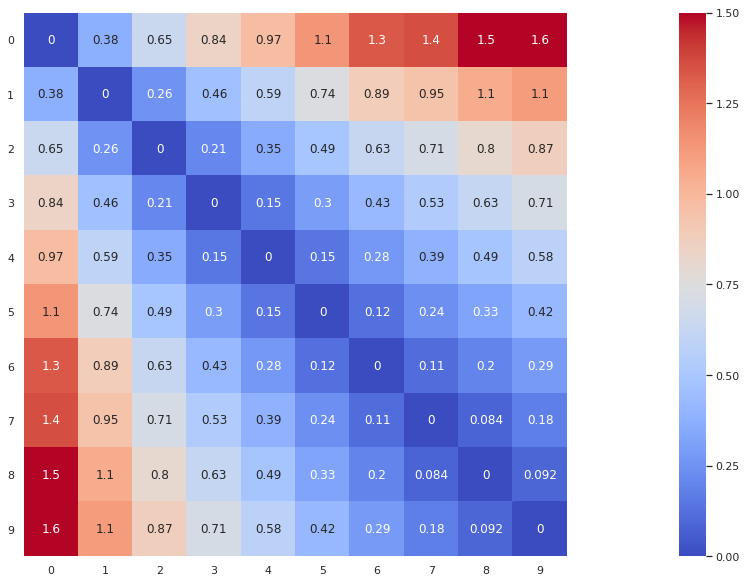

In [7]:
tiempo=G[0].shape[1]
g=[]
for k in range(m):
    mean=np.zeros(tiempo)
    std=np.zeros(tiempo)
    for i in range(tiempo):
        mean[i]=np.mean(G[k][i][:])
        std[i]=np.std(G[k][i][:])
    g.append((G[k],mean,std))

D=np.zeros((m,m))
for k in range(m):
    for n in range(m):
        d=np.zeros(tiempo)
        for i in range(tiempo):
            N1=g[k][0].shape[0]
            N2=g[n][0].shape[0]
            s2=((N1-1)*g[k][2][i]**2+(N2-1)*g[n][2][i]**2)/(N1+N2-2)
            d[i]=(g[k][1][i]-g[n][1][i])/np.sqrt(s2)
        D[k][n]=abs(np.mean(d))
E=D
from pandas import DataFrame
D = DataFrame(D)
print(D)
plt.figure(figsize=(40,10))
ax = sns.heatmap(D,annot=True,cmap="coolwarm",square=True,vmin=0,vmax=1.5)
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0)
plt.savefig("m10_graph.svg")

In [8]:
for i in range(m):
    print(np.mean(g[i][1]))

0.7665866004001439
0.8245174910037085
0.8610584501860867
0.8885683042026261
0.9060721493568031
0.9206202372832047
0.9318928160606628
0.9422804266906523
0.948858312666533
0.9556062928739883


In [15]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.integrate import simps

def area(g1,g2):
    mu1, std = norm.fit(g1)
#     plt.hist(g1, bins=25, density=True, alpha=0.6)
    x = np.linspace(0,1,100)
    fitted_pdf1 = norm.pdf(x,loc =mu1,scale = std)

#     plt.plot(x,fitted_pdf1,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)

    mu2, std = norm.fit(g2)
#     plt.hist(g2, bins=25, density=True, alpha=0.6)
    fitted_pdf2 = norm.pdf(x,loc =mu2,scale = std)

#     plt.plot(x,fitted_pdf2,"orange",label="Fitted normal dist",linestyle="dashed", linewidth=2)

    plt.show()
    idx = np.argwhere(np.diff(np.sign(fitted_pdf1 - fitted_pdf2))).flatten()
    
    if mu1 < mu2 :
        return simps(fitted_pdf2[:idx[0]],dx=0.01)+simps(fitted_pdf1[idx[0]:],dx=0.01)
    else:
        return 0

In [28]:
grupos=[]
for k in range(m):
    p=G[k].shape[0]
    g=np.zeros(p)
    for j in range(p):
        g[j]=np.mean(G[k][j])
    grupos.append(g)
for i in range(1,m):
    print(area(grupos[i-1],grupos[i]))

0.30414021981219236
0.3889864485681789
0.3826693770233868
0.9900000000101754
0.9900000000223929
0.990000000253475
0.9900000034970239
0.97481852241831
1.0123183701441802
